In [107]:
import pandas as pd

# Load the dataset
df = pd.read_csv('aus.csv')

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(None,
          Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
   WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
 0           W           44.0          W  ...        71.0         22.0   
 1         WNW           44.0        NNW  ...        44.0         25.0   
 2         WSW           46.0          W  ...        38.0         30.0   
 3          NE           24.0         SE  ...        45.0         16.0   
 4           W           41.0        ENE  ...        82.0         33.0   
 
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday

In [108]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display the columns with their missing value percentages
missing_percent.sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

In [109]:
# Define a threshold for removing columns with missing values
threshold = 30.0

# Identify columns to remove based on the threshold
columns_to_remove = missing_percent[missing_percent > threshold].index.tolist()

# Remove the identified columns
df = df.drop(columns=columns_to_remove)

# Display the updated DataFrame information
df.info(), columns_to_remove

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

(None, ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

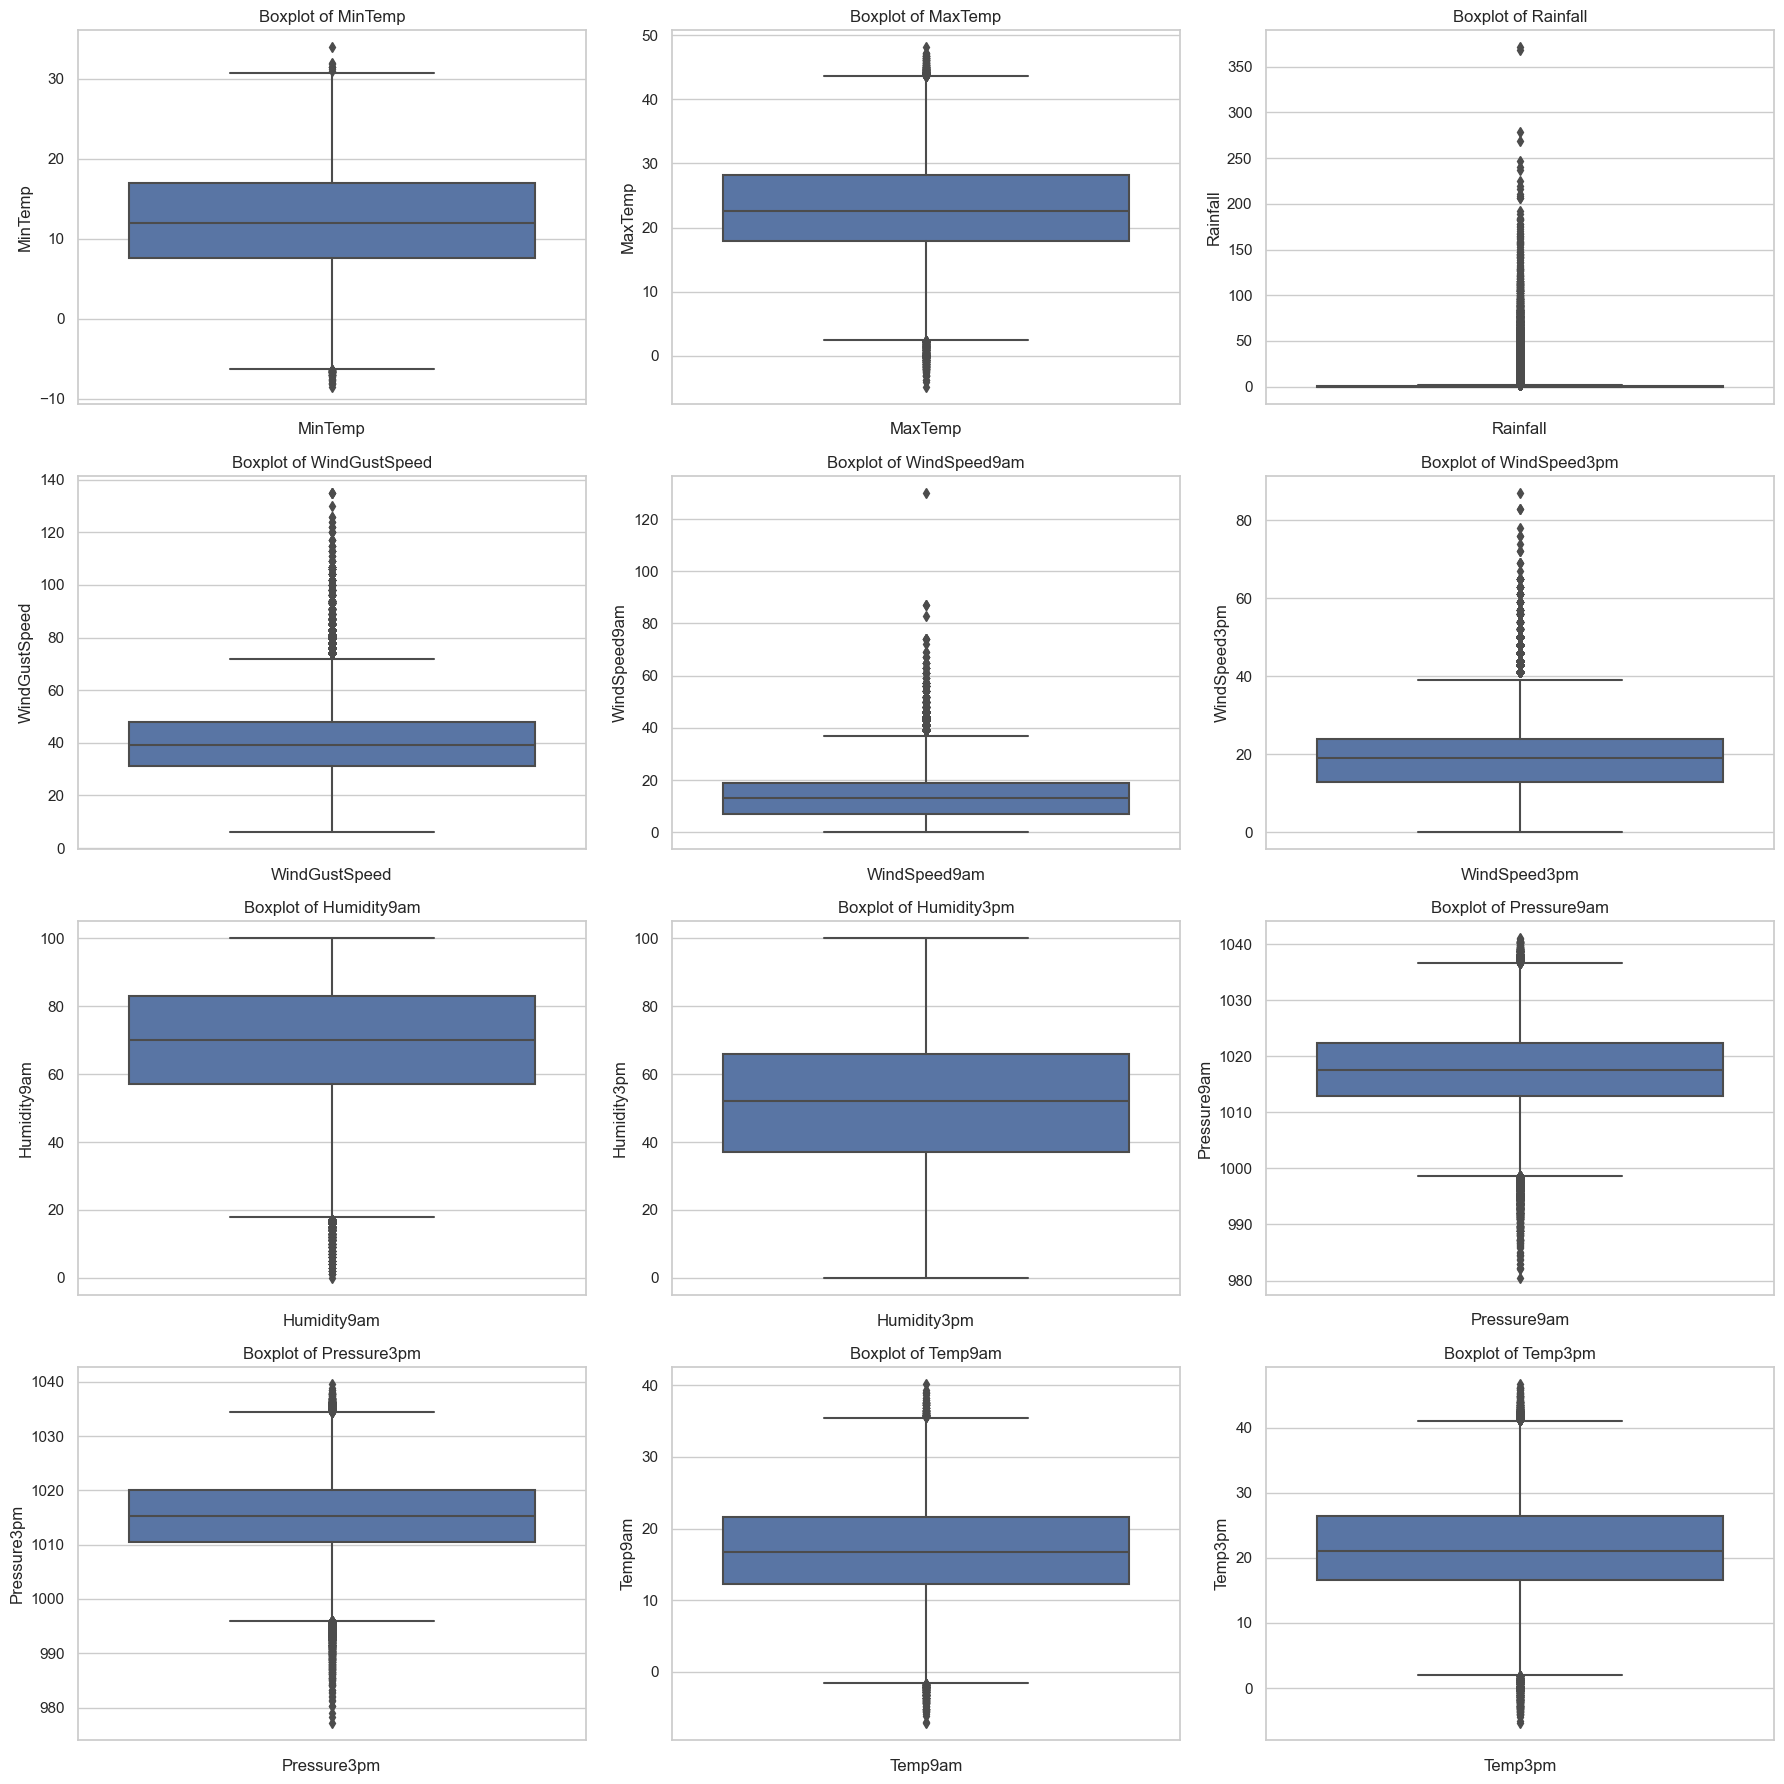

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and size for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(18, 18))

# Plot boxplots for numerical columns to visualize outliers
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [111]:
from scipy.stats import zscore
import numpy as np

# Step 2: Outlier Detection and Handling

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(df[numerical_cols]))

# Get boolean array indicating the presence of outliers
outliers = (z_scores > 3)

# Count outliers per numerical column
outliers_count = pd.DataFrame(outliers, columns=numerical_cols).sum()

outliers_count

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [112]:
# Calculate the IQR (Interquartile Range) for the 'Rainfall' column
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outlier values
rainfall_outliers = df[(df_cleaned['Rainfall'] < lower_bound) | (df['Rainfall'] > upper_bound)]['Rainfall']

# Display some statistics and unique outlier values for 'Rainfall'
rainfall_outliers.describe(), sorted(rainfall_outliers.unique())[:10]  # Show the first 10 unique outlier values

(count    25578.000000
 mean        12.416663
 std         16.601382
 min          2.100000
 25%          3.800000
 50%          7.000000
 75%         14.200000
 max        371.000000
 Name: Rainfall, dtype: float64,
 [2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0])

In [113]:
# Convert 'Date' to datetime type for time-based operations
df['Date'] = pd.to_datetime(df_original['Date'])

# Sort the DataFrame by 'Date' to ensure chronological order
# df.sort_values(by='Date', inplace=True)
sorted_df = df.sort_values(by=['Date', 'Location'])

# Apply linear interpolation to fill missing values in 'Rainfall'
df['Rainfall'] = df['Rainfall'].interpolate(method='linear')

# Check if there are any missing values left in 'Rainfall'
df_cleaned_null_count = df['Rainfall'].isna().sum()

df_cleaned_null_count

0

In [114]:
# Convert categorical columns to 'category' type
categorical_cols_to_convert = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df_cleaned[categorical_cols_to_convert] = df_cleaned[categorical_cols_to_convert].astype('category')

# Display updated data types for verification
df_cleaned.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir            category
WindGustSpeed           float64
WindDir9am             category
WindDir3pm             category
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday              category
RainTomorrow           category
dtype: object

In [115]:
# import pandas as pd
# from pykalman import KalmanFilter

# # Load the original dataset
# df_original = pd.read_csv('aus.csv')

# # Convert 'Date' to datetime type
# df_original['Date'] = pd.to_datetime(df_original['Date'])

# # Sort the DataFrame by 'Date' to ensure chronological order
# df_original.sort_values(by='Date', inplace=True)

# # Prepare the observed data for the Kalman filter
# observed_data = df_original['Rainfall'].dropna().values

# # Initialize the Kalman filter
# kf = KalmanFilter(initial_state_mean=observed_data[0])

# # Apply the Kalman filter to impute missing values
# kf = kf.em(observed_data)
# (imputed_data, _) = kf.filter(df_original['Rainfall'])

# # Update the 'Rainfall' column with imputed values
# df_original['Rainfall'] = imputed_data

# # Verify if there are any missing values left in 'Rainfall'
# rainfall_nan_after_kalman = df_original['Rainfall'].isna().sum()

# rainfall_nan_after_kalman

In [116]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [117]:
distinct_values = df['Location'].unique()
distinct_values

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [118]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# # Define the list of locations
# locations = ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
#              'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
#              'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
#              'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
#              'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
#              'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
#              'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
#              'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
#              'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
#              'AliceSprings', 'Darwin', 'Katherine', 'Uluru']

# # Create a basemap instance
# m = Basemap(llcrnrlon=112, llcrnrlat=-44, urcrnrlon=155, urcrnrlat=-10, projection='mill')

# # Draw coastlines, country borders, and states
# m.drawcoastlines()
# m.drawcountries()
# m.drawstates()

# # Plot the locations
# for location in locations:
#     lon, lat = df[df['Location'] == location][['Longitude', 'Latitude']].iloc[0]
#     x, y = m(lon, lat)
#     m.plot(x, y, 'bo', markersize=8, label=location)

# # Add legend
# plt.legend(loc='upper left')

# # Add a title
# plt.title('Weather Station Locations in Australia')

# # Show the plot
# plt.show()


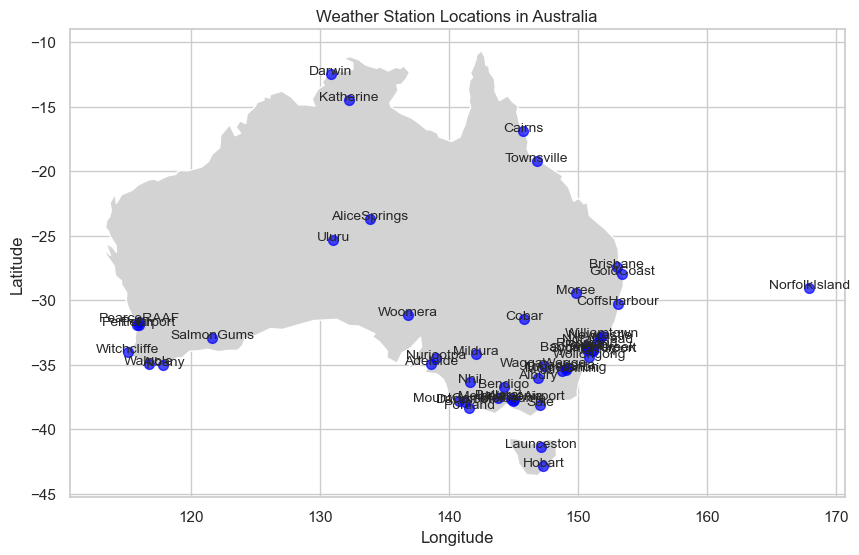

In [119]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile provided by geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only Australia
australia = world[world.name == 'Australia']

# Define the location coordinates
location_coordinates = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8799, 150.7525),
    'Cobar': (-31.4980, 145.8340),
    'CoffsHarbour': (-30.2960, 153.1150),
    'Moree': (-29.4644, 149.8415),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1150, 147.3677),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2820, 149.1287),
    'Tuggeranong': (-35.4232, 149.0860),
    'MountGinini': (-35.5294, 148.7727),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7589, 144.2836),
    'Sale': (-38.1119, 147.0634),
    'MelbourneAirport': (-37.6705, 144.8322),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2083, 142.1244),
    'Nhil': (-36.3328, 141.6502),
    'Portland': (-38.3510, 141.6056),
    'Watsonia': (-37.7117, 145.0835),
    'Dartmoor': (-37.9225, 141.2765),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2580, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8284, 140.7815),
    'Nuriootpa': (-34.4694, 139.0057),
    'Woomera': (-31.1995, 136.8254),
    'Albany': (-35.0031, 117.8656),
    'Witchcliffe': (-34.0170, 115.1001),
    'PearceRAAF': (-31.6675, 116.0159),
    'PerthAirport': (-31.9405, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9817, 121.6437),
    'Walpole': (-34.9773, 116.7311),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1401),
    'AliceSprings': (-23.7002, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4640, 132.2635),
    'Uluru': (-25.3444, 131.0369)
}

# Create a GeoDataFrame for the locations
geometry = gpd.points_from_xy([coord[1] for coord in location_coordinates.values()], [coord[0] for coord in location_coordinates.values()])
gdf = gpd.GeoDataFrame(location_coordinates.keys(), geometry=geometry, columns=['Location'])

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
australia.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=50, color='blue', alpha=0.7)

# Add labels for each location
for idx, row in gdf.iterrows():
    ax.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=10, ha='center')

# Set title and axis labels
ax.set_title('Weather Station Locations in Australia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [120]:
from geopy.distance import geodesic

# Coordinates of Sydney
sydney_coordinates = (-33.8688, 151.2093)

# Define the list of locations and their corresponding coordinates
location_coordinates = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8799, 150.7525),
    'Cobar': (-31.4980, 145.8340),
    'CoffsHarbour': (-30.2960, 153.1150),
    'Moree': (-29.4644, 149.8415),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1150, 147.3677),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2820, 149.1287),
    'Tuggeranong': (-35.4232, 149.0860),
    'MountGinini': (-35.5294, 148.7727),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7589, 144.2836),
    'Sale': (-38.1119, 147.0634),
    'MelbourneAirport': (-37.6705, 144.8322),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.2083, 142.1244),
    'Nhil': (-36.3328, 141.6502),
    'Portland': (-38.3510, 141.6056),
    'Watsonia': (-37.7117, 145.0835),
    'Dartmoor': (-37.9225, 141.2765),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2580, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8284, 140.7815),
    'Nuriootpa': (-34.4694, 139.0057),
    'Woomera': (-31.1995, 136.8254),
    'Albany': (-35.0031, 117.8656),
    'Witchcliffe': (-34.0170, 115.1001),
    'PearceRAAF': (-31.6675, 116.0159),
    'PerthAirport': (-31.9405, 115.9660),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9817, 121.6437),
    'Walpole': (-34.9773, 116.7311),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4298, 147.1401),
    'AliceSprings': (-23.7002, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4640, 132.2635),
    'Uluru': (-25.3444, 131.0369)
}

# Calculate distances and identify cities near Sydney
near_sydney_cities = []
threshold_distance = 150  # in kilometers

for city, coordinates in location_coordinates.items():
    distance = geodesic(sydney_coordinates, coordinates).kilometers
    if distance < threshold_distance:
        near_sydney_cities.append(city)

print("Cities near Sydney:", near_sydney_cities)

Cities near Sydney: ['BadgerysCreek', 'Newcastle', 'NorahHead', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'Williamtown', 'Wollongong']


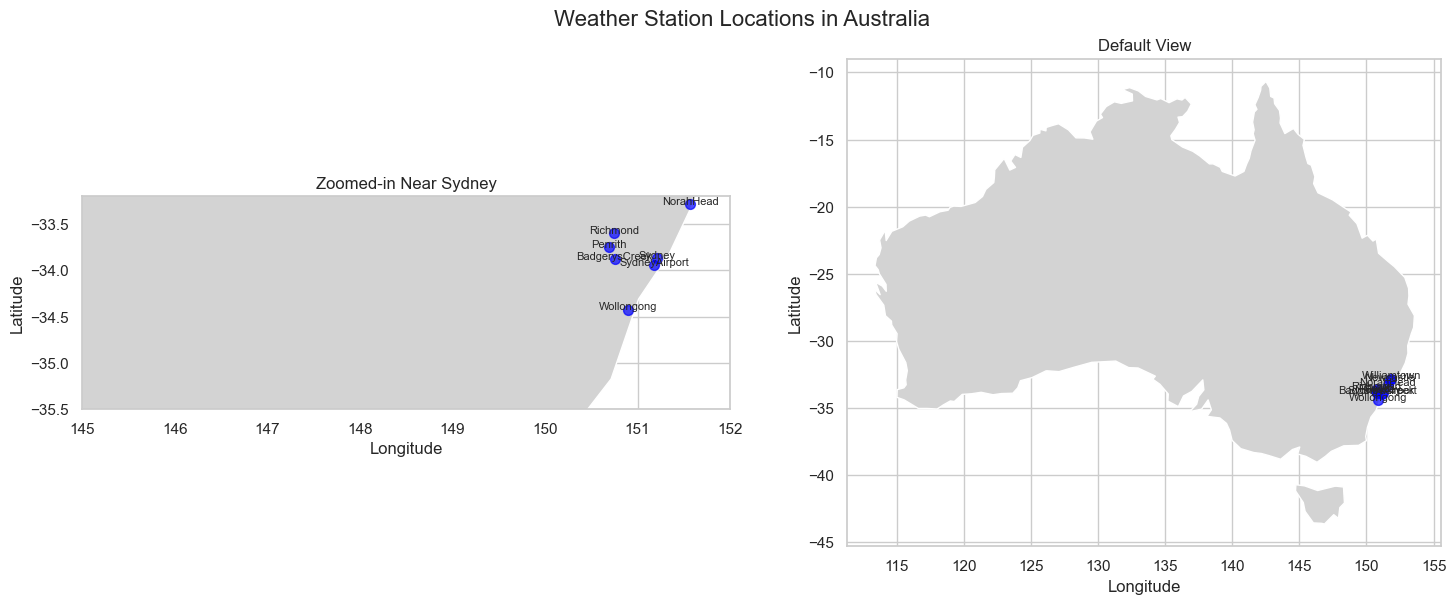

In [121]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map shapefile provided by geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only Australia
australia = world[world.name == 'Australia']

# Define the location coordinates

location_coordinates = {
    'BadgerysCreek': (-33.8799, 150.7525),
    'Newcastle': (-32.9169, 151.7500),
    'NorahHead': (-33.2831, 151.5675),
    'Penrith': (-33.7526, 150.6941),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'Williamtown': (-32.8150, 151.8433),
    'Wollongong': (-34.4278, 150.8931),
}

# Create a GeoDataFrame for the locations
geometry = gpd.points_from_xy([coord[1] for coord in location_coordinates.values()], [coord[0] for coord in location_coordinates.values()])
gdf = gpd.GeoDataFrame(location_coordinates.keys(), geometry=geometry, columns=['Location'])

# Plot the map
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle('Weather Station Locations in Australia', fontsize=16)

# Zoomed-in version near Sydney
australia.plot(ax=ax1, color='lightgrey')
gdf.plot(ax=ax1, markersize=50, color='blue', alpha=0.7)
ax1.set_title('Zoomed-in Near Sydney')
ax1.set_xlim(145, 152)
ax1.set_ylim(-35.5, -33.2)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Default version of the map
australia.plot(ax=ax2, color='lightgrey')
gdf.plot(ax=ax2, markersize=50, color='blue', alpha=0.7)
ax2.set_title('Default View')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Add labels for each location with reduced font size
for idx, row in gdf.iterrows():
    ax1.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=8, ha='center')
    ax2.annotate(row['Location'], (row['geometry'].x, row['geometry'].y), fontsize=8, ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


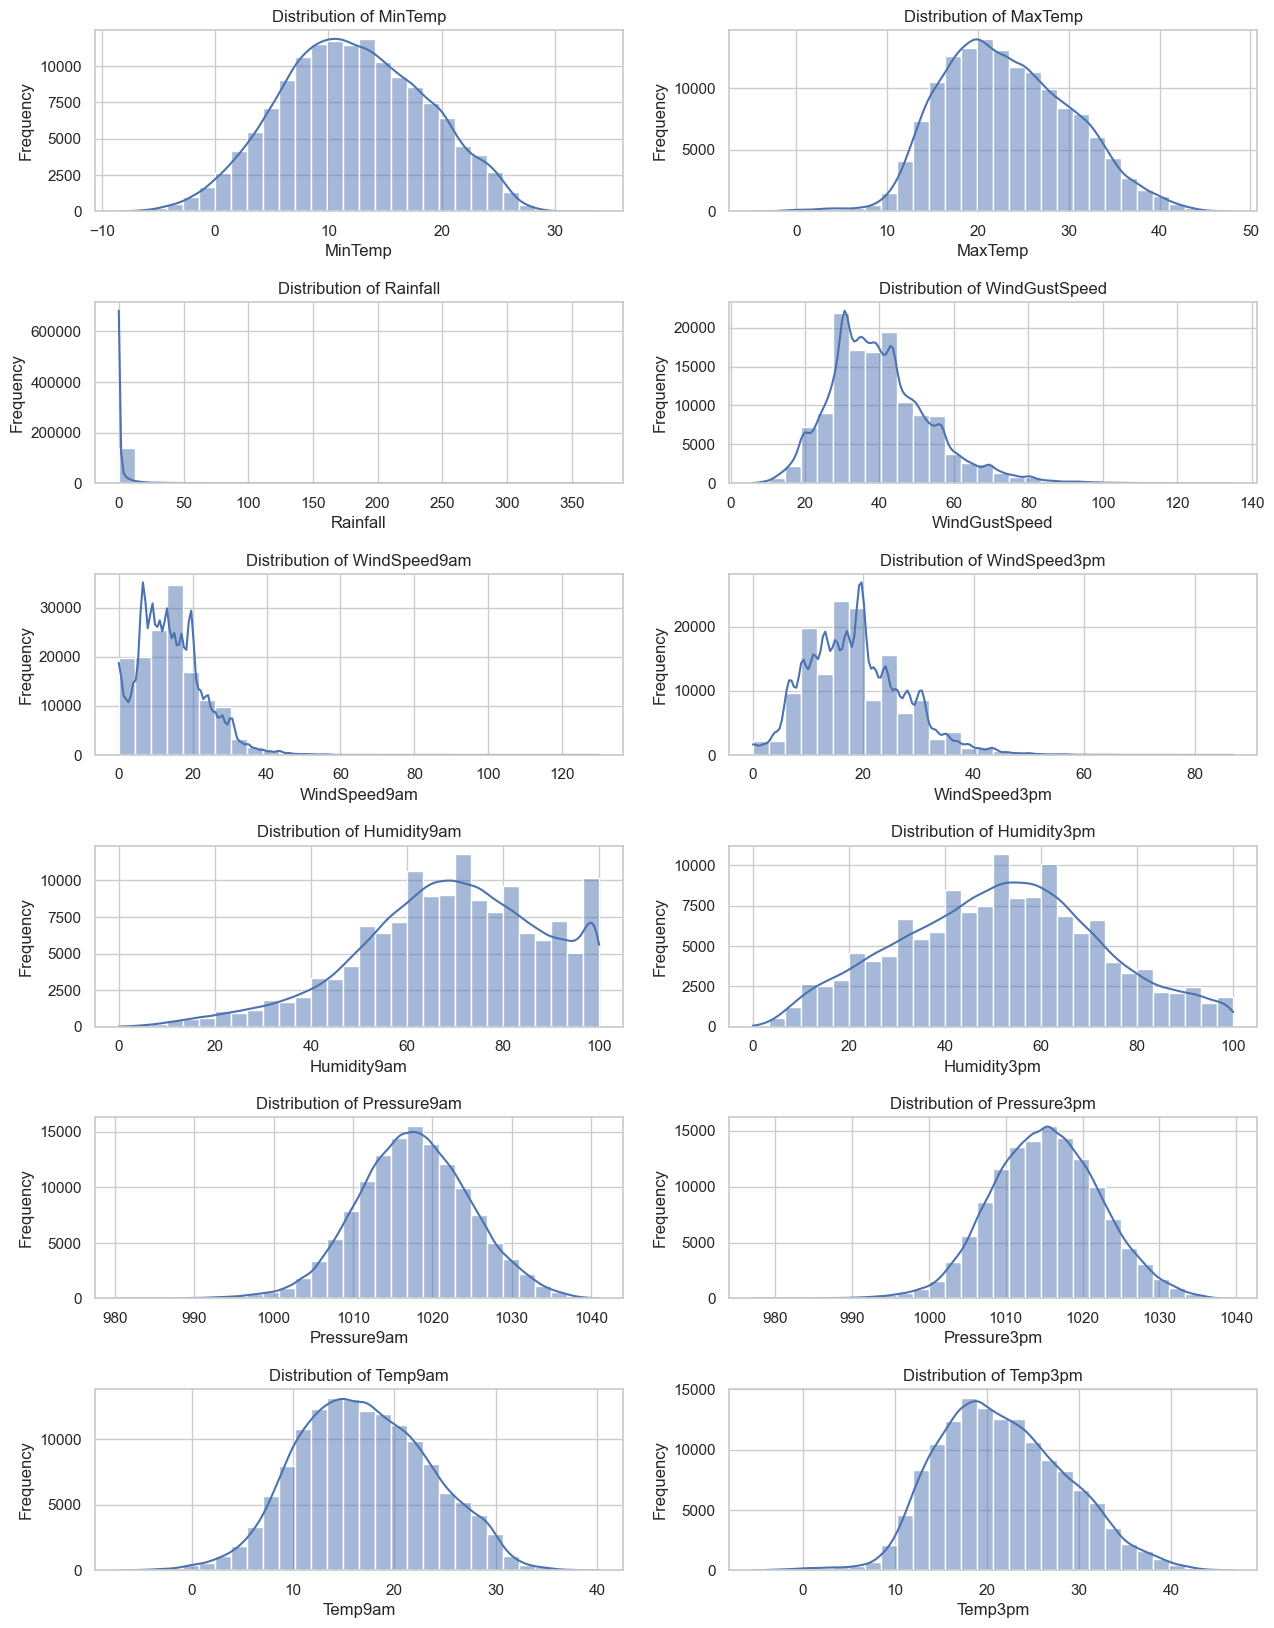

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for visualization
numeric_columns = df.select_dtypes(include=['float64']).columns

# Set up the matplotlib figure
n = len(numeric_columns)
n_cols = 2
n_rows = int(n / n_cols) + (n % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array and remove extra subplots
axes = axes.flatten()
for ax in axes[n:]:
    ax.remove()

# Plot distribution of numeric variables
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()


In [132]:
# # Convert the 'Date' column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Sort the dataset by date for time series plotting
# dataset_sorted = df.sort_values('Date')

# # Resample the dataset by month and take the mean to reduce the number of data points
# dataset_resampled = dataset_sorted.resample('M', on='Date').mean()

# # Plot time series for key variables: MinTemp, MaxTemp, and Rainfall
# plt.figure(figsize=(18, 12))

# # Plot MinTemp
# plt.subplot(3, 1, 1)
# plt.plot(dataset_resampled.index, dataset_resampled['MinTemp'], label='Min Temp (°C)', color='blue')
# plt.title('Monthly Average Minimum Temperature Over Time')
# plt.xlabel('Date')
# plt.ylabel('Min Temp (°C)')
# plt.grid(True)

# # Plot MaxTemp
# plt.subplot(3, 1, 2)
# plt.plot(dataset_resampled.index, dataset_resampled['MaxTemp'], label='Max Temp (°C)', color='red')
# plt.title('Monthly Average Maximum Temperature Over Time')
# plt.xlabel('Date')
# plt.ylabel('Max Temp (°C)')
# plt.grid(True)

# # Plot Rainfall
# plt.subplot(3, 1, 3)
# plt.plot(dataset_resampled.index, dataset_resampled['Rainfall'], label='Rainfall (mm)', color='green')
# plt.title('Monthly Average Rainfall Over Time')
# plt.xlabel('Date')
# plt.ylabel('Rainfall (mm)')
# plt.grid(True)

# # Show the plots
# plt.tight_layout()
# plt.show()


TypeError: Could not convert CanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberraCanberra to numeric

In [133]:
# List of specified districts
specified_districts = ['BadgerysCreek', 'Newcastle', 'NorahHead', 'Penrith', 'Richmond', 
                       'Sydney', 'SydneyAirport', 'Williamtown', 'Wollongong']

# Filter the dataset for the specified districts
filtered_df = df[df['Location'].isin(specified_districts)]

# Convert 'Date' column to datetime type and extract the year
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Year'] = filtered_df['Date'].dt.year

# Display the first few rows of the filtered dataset
filtered_df.head()

C:\Users\ayodh\AppData\Local\Temp\ipykernel_13160\218589836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
C:\Users\ayodh\AppData\Local\Temp\ipykernel_13160\218589836.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,21.0,NaN,No,No,2009
3041,2009-01-02,BadgerysCreek,14.7,26.1,0.0,SE,46.0,SE,SE,7.0,24.0,59.0,54.0,1012.9,1013.5,20.7,22.2,No,No,2009
3042,2009-01-03,BadgerysCreek,13.6,22.3,0.0,NNE,30.0,ESE,NE,6.0,15.0,57.0,51.0,1021.9,1019.2,17.9,21.7,No,No,2009
3043,2009-01-04,BadgerysCreek,17.7,31.2,0.0,NE,39.0,NNE,N,9.0,15.0,62.0,43.0,1018.7,1013.6,22.0,30.6,No,No,2009
3044,2009-01-05,BadgerysCreek,15.5,38.8,0.0,SW,50.0,NNE,W,7.0,17.0,67.0,19.0,1013.2,1007.6,22.7,37.6,No,No,2009


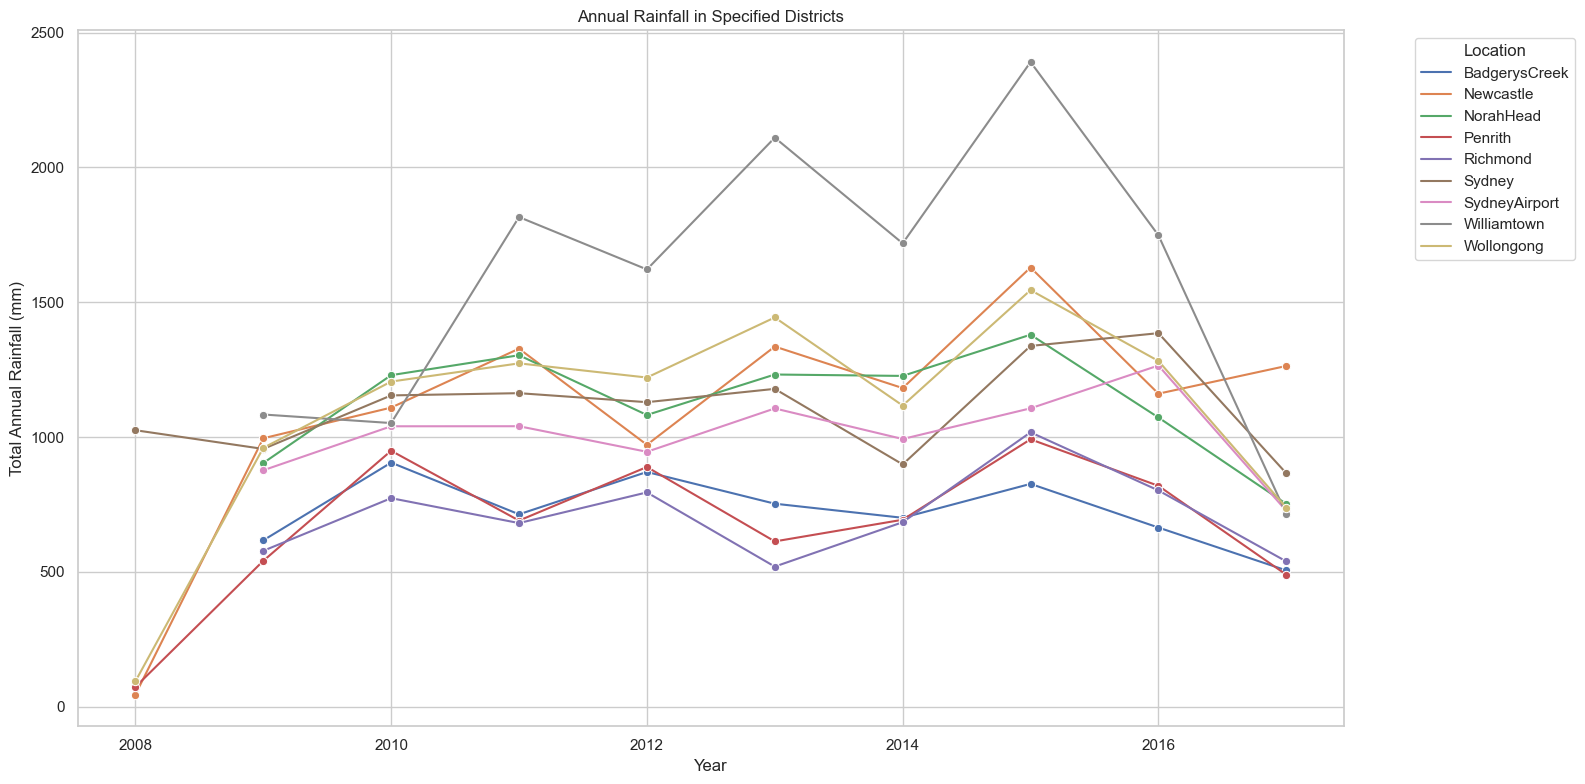

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by district and year, then sum the rainfall
grouped_df = filtered_df.groupby(['Location', 'Year'])['Rainfall'].sum().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Rainfall', hue='Location', data=grouped_df, marker='o')
plt.title('Annual Rainfall in Specified Districts')
plt.xlabel('Year')
plt.ylabel('Total Annual Rainfall (mm)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [136]:
# Identify the range of years for each district
year_range_per_district = filtered_df.groupby('Location')['Year'].agg(['min', 'max']).reset_index()

year_range_per_district


,Location,min,max
0,BadgerysCreek,2009,2017
1,Newcastle,2008,2017
2,NorahHead,2009,2017
3,Penrith,2008,2017
4,Richmond,2009,2017
5,Sydney,2008,2017
6,SydneyAirport,2009,2017
7,Williamtown,2009,2017
8,Wollongong,2008,2017


In [137]:
from datetime import timedelta

# Function to generate a list of all dates for a given range of years
def generate_all_dates(start_year, end_year):
    start_date = pd.Timestamp(f"{start_year}-01-01")
    end_date = pd.Timestamp(f"{end_year}-12-31")
    all_dates = pd.date_range(start_date, end_date)
    return all_dates

# Dictionary to store missing dates for each district
missing_dates_per_district = {}

# Check for missing dates
for idx, row in year_range_per_district.iterrows():
    location = row['Location']
    min_year = row['min']
    max_year = row['max']
    
    # Generate all expected dates for the district
    all_dates = generate_all_dates(min_year, max_year)
    
    # Extract the actual dates from the dataset for the district
    actual_dates = filtered_df[filtered_df['Location'] == location]['Date']
    
    # Identify missing dates by comparing the sets
    missing_dates = set(all_dates) - set(actual_dates)
    
    # Sort the missing dates and add to the dictionary
    missing_dates_per_district[location] = sorted(list(missing_dates))

# Display the number of missing dates for each district
missing_date_counts = {district: len(dates) for district, dates in missing_dates_per_district.items()}
missing_date_counts


{'BadgerysCreek': 278,
 'Newcastle': 614,
 'NorahHead': 283,
 'Penrith': 614,
 'Richmond': 278,
 'Sydney': 309,
 'SydneyAirport': 278,
 'Williamtown': 278,
 'Wollongong': 613}

In [142]:
# Filter the dataset to include only data from 2009 to 2017
filtered_df_2009_2017 = filtered_df[(filtered_df['Year'] >= 2009) & (filtered_df['Year'] <= 2017)]

# Check the filtered data
filtered_df_2009_2017.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
3040,2009-01-01,BadgerysCreek,13.3,34.2,0.0,W,61.0,NNE,NaN,11.0,NaN,67.0,NaN,1005.6,NaN,21.0,NaN,No,No,2009
3041,2009-01-02,BadgerysCreek,14.7,26.1,0.0,SE,46.0,SE,SE,7.0,24.0,59.0,54.0,1012.9,1013.5,20.7,22.2,No,No,2009
3042,2009-01-03,BadgerysCreek,13.6,22.3,0.0,NNE,30.0,ESE,NE,6.0,15.0,57.0,51.0,1021.9,1019.2,17.9,21.7,No,No,2009
3043,2009-01-04,BadgerysCreek,17.7,31.2,0.0,NE,39.0,NNE,N,9.0,15.0,62.0,43.0,1018.7,1013.6,22.0,30.6,No,No,2009
3044,2009-01-05,BadgerysCreek,15.5,38.8,0.0,SW,50.0,NNE,W,7.0,17.0,67.0,19.0,1013.2,1007.6,22.7,37.6,No,No,2009


In [143]:
# Dictionary to store missing dates for each district in the filtered data
missing_dates_per_district_filtered = {}

# Check for missing dates in the filtered data
for idx, row in year_range_per_district.iterrows():
    location = row['Location']
    
    # Generate all expected dates for the district within 2009 to 2017
    all_dates = generate_all_dates(2009, 2017)
    
    # Extract the actual dates from the filtered dataset for the district
    actual_dates = filtered_df_2009_2017[filtered_df_2009_2017['Location'] == location]['Date']
    
    # Identify missing dates by comparing the sets
    missing_dates = set(all_dates) - set(actual_dates)
    
    # Sort the missing dates and add to the dictionary
    missing_dates_per_district_filtered[location] = sorted(list(missing_dates))

# Display the number of missing dates for each district in the filtered data
missing_date_counts_filtered = {district: len(dates) for district, dates in missing_dates_per_district_filtered.items()}
missing_date_counts_filtered


{'BadgerysCreek': 278,
 'Newcastle': 279,
 'NorahHead': 283,
 'Penrith': 279,
 'Richmond': 278,
 'Sydney': 278,
 'SydneyAirport': 278,
 'Williamtown': 278,
 'Wollongong': 278}

In [144]:
# Dictionary to store missing dates grouped by year for each district
missing_dates_by_year_per_district = {}

# Group missing dates by year
for district, missing_dates in missing_dates_per_district_filtered.items():
    missing_dates_by_year = {}
    for date in missing_dates:
        year = date.year
        if year not in missing_dates_by_year:
            missing_dates_by_year[year] = []
        missing_dates_by_year[year].append(date)
    
    # Count the number of missing dates for each year
    missing_dates_by_year_counts = {year: len(dates) for year, dates in missing_dates_by_year.items()}
    
    missing_dates_by_year_per_district[district] = missing_dates_by_year_counts

# Display the number of missing dates grouped by year for each district
missing_dates_by_year_per_district


{'BadgerysCreek': {2011: 30, 2012: 31, 2013: 28, 2017: 189},
 'Newcastle': {2011: 30, 2012: 31, 2013: 28, 2017: 190},
 'NorahHead': {2011: 30, 2012: 31, 2013: 33, 2017: 189},
 'Penrith': {2009: 1, 2011: 30, 2012: 31, 2013: 28, 2017: 189},
 'Richmond': {2011: 30, 2012: 31, 2013: 28, 2017: 189},
 'Sydney': {2011: 30, 2012: 31, 2013: 28, 2017: 189},
 'SydneyAirport': {2011: 30, 2012: 31, 2013: 28, 2017: 189},
 'Williamtown': {2011: 30, 2012: 31, 2013: 28, 2017: 189},
 'Wollongong': {2011: 30, 2012: 31, 2013: 28, 2017: 189}}

In [145]:
# Filter the data for the year 2017 and find the last date for each district
last_date_2017_per_district = filtered_df_2009_2017[filtered_df_2009_2017['Year'] == 2017].groupby('Location')['Date'].max().reset_index()

last_date_2017_per_district


,Location,Date
0,BadgerysCreek,2017-06-25
1,Newcastle,2017-06-24
2,NorahHead,2017-06-25
3,Penrith,2017-06-25
4,Richmond,2017-06-25
5,Sydney,2017-06-25
6,SydneyAirport,2017-06-25
7,Williamtown,2017-06-25
8,Wollongong,2017-06-25


In [146]:
# Pivot the filtered dataframe to have 'Date' as index and each district as a column
pivot_df = filtered_df_2009_2017.pivot(index='Date', columns='Location', values='Rainfall')

# Fill NaN values with 0, as we assume no data means no rainfall
pivot_df.fillna(0, inplace=True)

# Display the first few rows of the pivoted dataframe
pivot_df.head()


Location,BadgerysCreek,Newcastle,NorahHead,Penrith,Richmond,Sydney,SydneyAirport,Williamtown,Wollongong
Date,,,,,,,,,
2009-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-03,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.4,0.0
2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


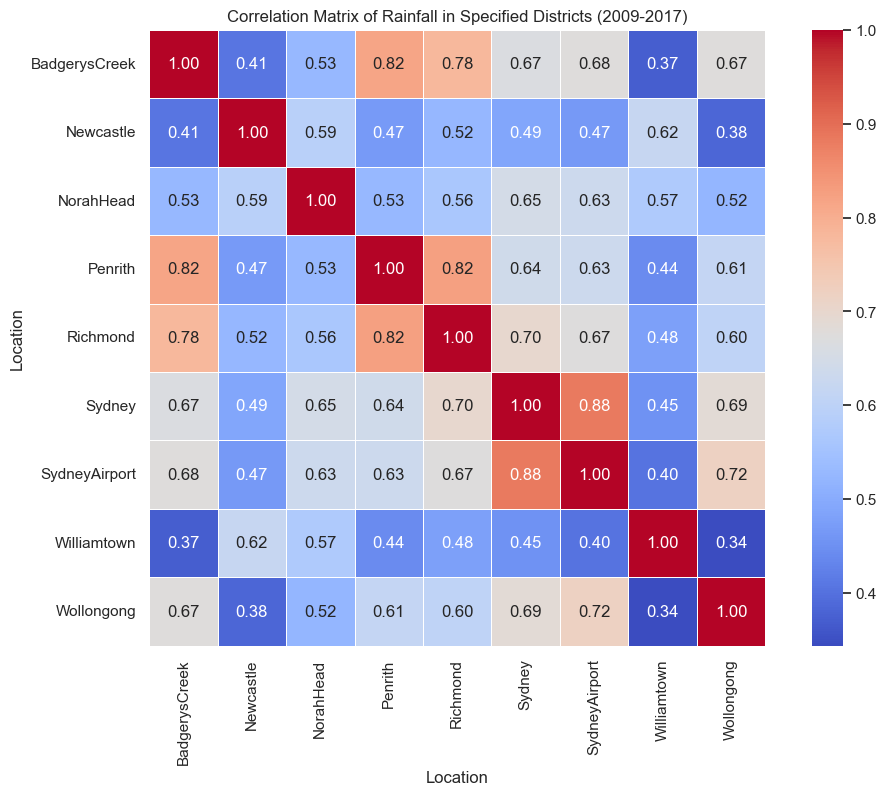

In [147]:
# Calculate the correlation matrix for the rainfall data of the specified districts
correlation_matrix = pivot_df.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Matrix of Rainfall in Specified Districts (2009-2017)')
plt.show()


In [150]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the scaler on the training data and transform both the training and test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Also scale the target variable (y_train and y_test)
# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# # Show the first few rows of scaled features
# X_train_scaled[:5], y_train_scaled[:5]


NameError: name 'train_test_split' is not defined